In [3]:
import karabo_data as kd
from matplotlib import pyplot as plt
from karabo_data.geometry2 import AGIPD_1MGeometry
import numpy as np
from matplotlib.cm import viridis
import matplotlib
cmap = viridis
cmap.set_bad('0.25',1)
#matplotlib.rc('image', cmap=cmap)
%matplotlib notebook

In [16]:
kd.__file__

'/home/bergeman/workspace/karabo_data/karabo_data/__init__.py'

In [17]:
exmpl_dir = '/gpfs/exfel/exp/XMPL/201750/p700000/proc/r0273'

In [18]:
run_dir = kd.RunDirectory(exmpl_dir)

In [19]:
tId, data = run_dir.train_from_index(10)
data_ary = kd.stack_detector_data(data, 'image.data')

In [20]:
sorted(data.keys())

['SPB_DET_AGIPD1M-1/DET/0CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/10CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/11CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/12CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/13CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/14CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/15CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/1CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/2CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/3CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/4CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/5CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/6CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/7CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/8CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/9CH0:xtdf']

In [21]:
geom = AGIPD_1MGeometry.from_crystfel_geom('xfel.geom')

In [22]:
img, center = geom.position_all_modules(data_ary)

In [23]:
img.shape

(176, 1259, 1092)

In [24]:
data_ary.shape

(176, 16, 512, 128)

<IPython.core.display.Javascript object>


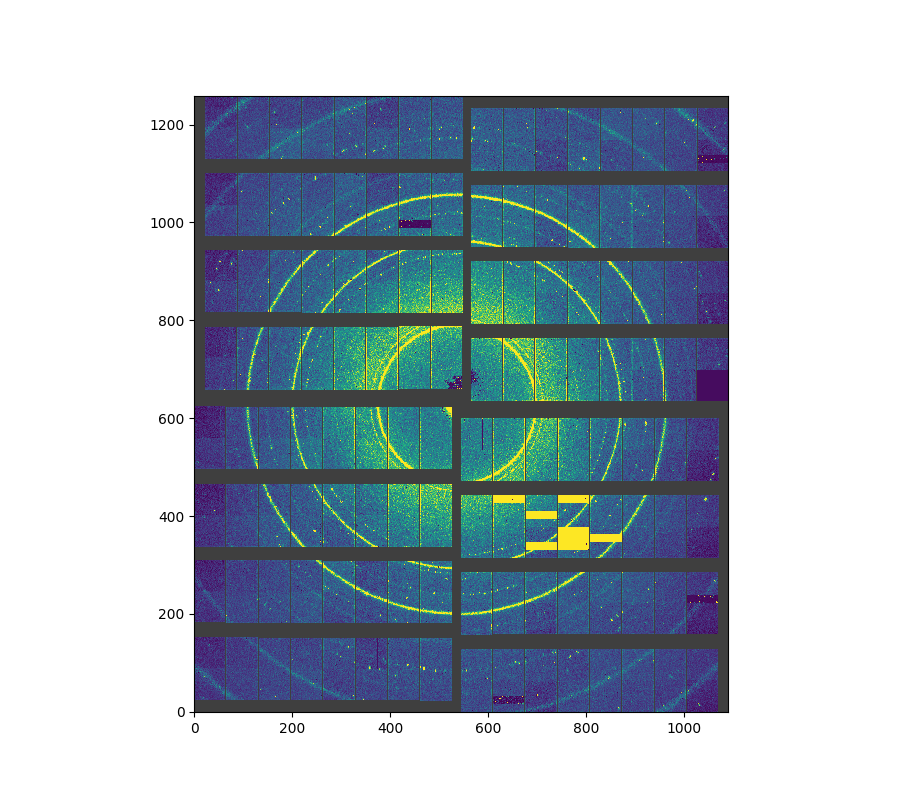

In [27]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111)
ax.imshow(img[10],vmin=-50, vmax=1500, origin='lower', cmap=cmap)
fig.savefig('img/AGIPD_module.png', bbox_inches='tight', format='png')

In [ ]:
geom.plot_data_fast(np.clip(data_ary[10], -50, 1500))

In [ ]:
plt.imshow(np.nanmax(kd.stack_detector_data(data, 'image.data'), axis=0)[3].T,vmin=-500, vmax=2500, cmap='RdYlBu')

In [4]:
xmpl_dir = '/gpfs/exfel/exp/XMPL/201750/p700000/raw/r0273'
run_dir = kd.RunDirectory(xmpl_dir)
run_dir.info()

# of trains:    156
Duration:       0:00:15.500000
First train ID: 198425241
Last train ID:  198425396

16 detector modules (SPB_DET_AGIPD1M-1)
  e.g. module SPB_DET_AGIPD1M-1 0 : 512 x 128 pixels
  176 frames per train, 27456 total frames

2 instrument sources (excluding detectors):
  - SA1_XTD2_XGM/XGM/DOOCS:output
  - SPB_XTD9_XGM/XGM/DOOCS:output

13 control sources:
  - ACC_SYS_DOOCS/CTRL/BEAMCONDITIONS
  - SA1_XTD2_XGM/XGM/DOOCS
  - SPB_IRU_AGIPD1M/PSC/HV
  - SPB_IRU_AGIPD1M/TSENS/H1_T_EXTHOUS
  - SPB_IRU_AGIPD1M/TSENS/H2_T_EXTHOUS
  - SPB_IRU_AGIPD1M/TSENS/Q1_T_BLOCK
  - SPB_IRU_AGIPD1M/TSENS/Q2_T_BLOCK
  - SPB_IRU_AGIPD1M/TSENS/Q3_T_BLOCK
  - SPB_IRU_AGIPD1M/TSENS/Q4_T_BLOCK
  - SPB_IRU_AGIPD1M1/CTRL/MC1
  - SPB_IRU_AGIPD1M1/CTRL/MC2
  - SPB_IRU_VAC/GAUGE/GAUGE_FR_6
  - SPB_XTD9_XGM/XGM/DOOCS



In [5]:
T = run_dir.get_series('SA1_XTD2_XGM/XGM/DOOCS', 'pulseEnergy.photonFlux.value')

<IPython.core.display.Javascript object>


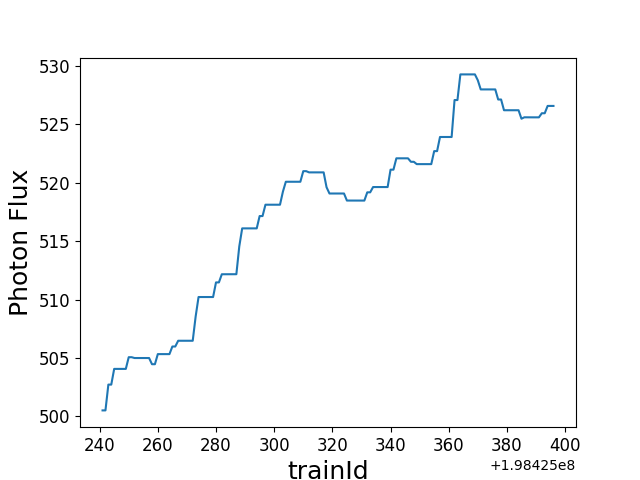

In [6]:
fig, ax = plt.subplots(1,1)
ax.set_ylabel('Photon Flux', fontsize=18)
ax.set_xlabel('TrainId', fontsize=18)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
_ = T.plot(ax=ax)

In [7]:
tid, dd = run_dir.train_from_index(0)

In [ ]:
dd.keys()

In [8]:
xr = run_dir.get_array('SA1_XTD2_XGM/XGM/DOOCS:output','data.intensityTD')

In [33]:
run_dir.get_array?

In [9]:
xr.values

array([[ 957.0532 , 1026.0005 ,  949.8755 , ...,    0.     ,    0.     ,
           0.     ],
       [ 763.8806 ,  794.2738 ,  868.2455 , ...,    0.     ,    0.     ,
           0.     ],
       [ 859.37   ,  995.1641 ,  838.5669 , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [ 945.2731 ,  812.4336 ,  839.45654, ...,    0.     ,    0.     ,
           0.     ],
       [ 903.26855,  940.15125,  953.9436 , ...,    0.     ,    0.     ,
           0.     ],
       [ 944.08386,  949.549  ,  861.7509 , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

<IPython.core.display.Javascript object>


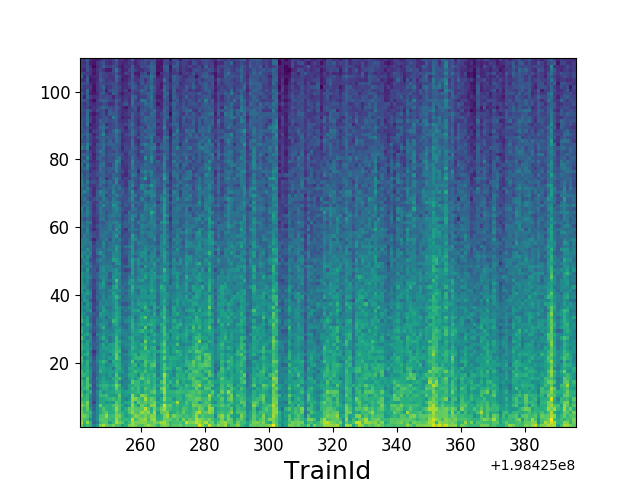

In [10]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('TrainId', fontsize=18)
#ax.set_ylabel('PulseId', fontsize=18)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
_ = ax.pcolormesh(xr.trainId, np.arange(1,111), xr.values[:,:110].T, cmap='viridis')

In [ ]:
fluxes_pos = run_dir.get_dataframe(fields=[("*_XGM/*", "*.i[xy]Pos")])

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
fluxes_pos.plot.scatter(x='SA1_XTD2_XGM/XGM/DOOCS/beamPosition.iyPos', y='SPB_XTD9_XGM/XGM/DOOCS/beamPosition.iyPos', ax=ax)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_ylabel('SBP Beam - y pos', fontsize=18)
ax.set_xlabel('SA1 Beam - y pos', fontsize=18)


In [ ]:
run_dir.selection

In [ ]:
run_dir.instrument_sources

In [ ]:
sel = run_dir.select('SPB_DET_AGIPD1M-1/DET/??CH0:xtdf')

In [ ]:
sel.selection

In [ ]:
_, train_data = run_dir.train_from_index(0)

In [ ]:
run_dir._keys_for_source('SPB_DET_AGIPD1M-1/DET/0CH0:xtdf')